#Retail Fashion E-Commerce Analysis Project

This project analyzes customer behavior and sales trends using a fictional Bangladeshi retail fashion dataset. The analysis includes data cleaning, EDA, hypothesis testing, and regression modeling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# Load datase
df = pd.read_excel("retail_fashion_dataset.xlsx")
df.head()

,CustomerID,Gender,Age,Location,Membership,AnnualIncome,ProductCategory,AmountSpent,ItemsPurchased,SatisfactionRating,Returned,PaymentMethod
0,1,Male,33,Dhaka,Platinum,573959,Accessories,3878.15,0,3,Yes,COD
1,2,Other,18,Dhaka,Regular,1282335,Traditional Wear,2753.63,3,3,No,COD
2,3,Female,35,Sylhet,Platinum,1103278,Bottoms,3591.77,4,4,No,Nagad
3,4,Female,38,Sylhet,Platinum,920423,Accessories,3863.37,4,2,No,Nagad
4,5,Male,37,Dhaka,Gold,814407,Traditional Wear,3335.53,5,2,No,Nagad


##  Data Cleaning & Preprocessing

In [3]:
# Check nulls
print("Missing values:")
print(df.isnull().sum())

# Check dtypes
print("\nData Types:")
print(df.dtypes)

# Unique values in categorical columns
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\n{col} unique values: {df[col].unique()}")

# Encoding categorical variables
label_encoders = {}
for col in ['Gender', 'Membership', 'ProductCategory', 'Returned', 'PaymentMethod']:
    le = LabelEncoder()
    df[col + '_encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()

Missing values:
CustomerID                 0
Gender                     0
Age                        0
Location                   0
Membership                 0
AnnualIncome               0
ProductCategory            0
AmountSpent                0
ItemsPurchased             0
SatisfactionRating         0
Returned                   0
PaymentMethod              0
Gender_encoded             0
Membership_encoded         0
ProductCategory_encoded    0
Returned_encoded           0
PaymentMethod_encoded      0
dtype: int64

Data Types:
CustomerID                   int64
Gender                      object
Age                          int64
Location                    object
Membership                  object
AnnualIncome                 int64
ProductCategory             object
AmountSpent                float64
ItemsPurchased               int64
SatisfactionRating           int64
Returned                    object
PaymentMethod               object
Gender_encoded               int64
Membership

,CustomerID,Gender,Age,Location,Membership,AnnualIncome,ProductCategory,AmountSpent,ItemsPurchased,SatisfactionRating,Returned,PaymentMethod,Gender_encoded,Membership_encoded,ProductCategory_encoded,Returned_encoded,PaymentMethod_encoded
0,1,Male,33,Dhaka,Platinum,573959,Accessories,3878.15,0,3,Yes,COD,1,1,0,1,0
1,2,Other,18,Dhaka,Regular,1282335,Traditional Wear,2753.63,3,3,No,COD,2,2,4,0,0
2,3,Female,35,Sylhet,Platinum,1103278,Bottoms,3591.77,4,4,No,Nagad,0,1,1,0,3
3,4,Female,38,Sylhet,Platinum,920423,Accessories,3863.37,4,2,No,Nagad,0,1,0,0,3
4,5,Male,37,Dhaka,Gold,814407,Traditional Wear,3335.53,5,2,No,Nagad,1,0,4,0,3


## Exploratory Data Analysis (EDA)

In [4]:
# Descriptive statistics
df.describe()

,CustomerID,Age,AnnualIncome,AmountSpent,ItemsPurchased,SatisfactionRating,Gender_encoded,Membership_encoded,ProductCategory_encoded,Returned_encoded,PaymentMethod_encoded
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,32.796000,7.975050e+05,3038.726240,3.022000,3.031000,0.661000,1.689000,1.979000,0.148000,2.017000
std,288.819436,9.254298,2.043810e+05,998.296348,1.765399,1.421992,0.651539,1.018487,1.437576,0.355278,1.384423
min,1.000000,18.000000,2.141100e+05,500.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,250.750000,26.000000,6.532608e+05,2342.557500,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000
50%,500.500000,32.000000,8.015055e+05,3024.135000,3.000000,3.000000,1.000000,2.000000,2.000000,0.000000,2.000000
75%,750.250000,39.000000,9.330095e+05,3707.177500,4.000000,4.000000,1.000000,2.000000,3.000000,0.000000,3.000000
max,1000.000000,63.000000,1.448618e+06,7052.550000,11.000000,5.000000,2.000000,3.000000,4.000000,1.000000,4.000000


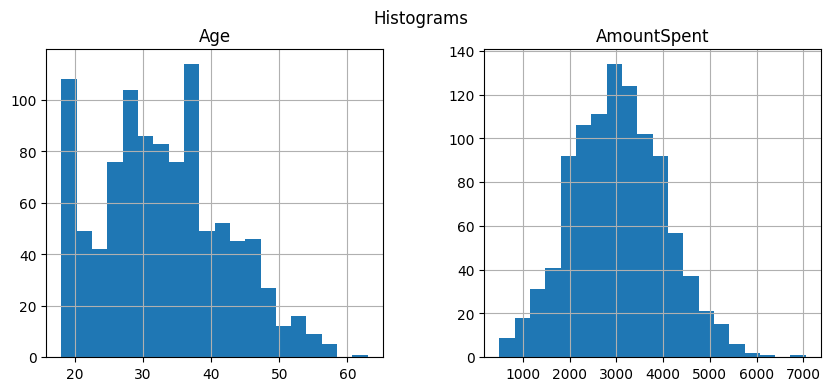

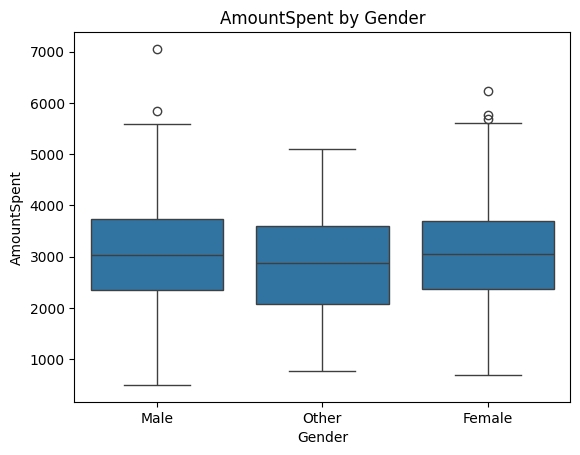

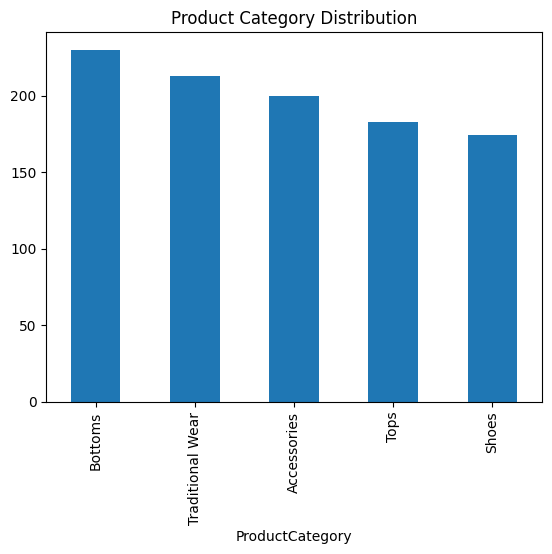

In [5]:
# Histogram for Age and AmountSpent
df[['Age', 'AmountSpent']].hist(bins=20, figsize=(10, 4))
plt.suptitle("Histograms")
plt.show()

# Boxplot: AmountSpent by Gender
sns.boxplot(data=df, x='Gender', y='AmountSpent')
plt.title("AmountSpent by Gender")
plt.show()

# Bar Chart: ProductCategory
df['ProductCategory'].value_counts().plot(kind='bar')
plt.title("Product Category Distribution")
plt.show()

## Bivariate Analysis

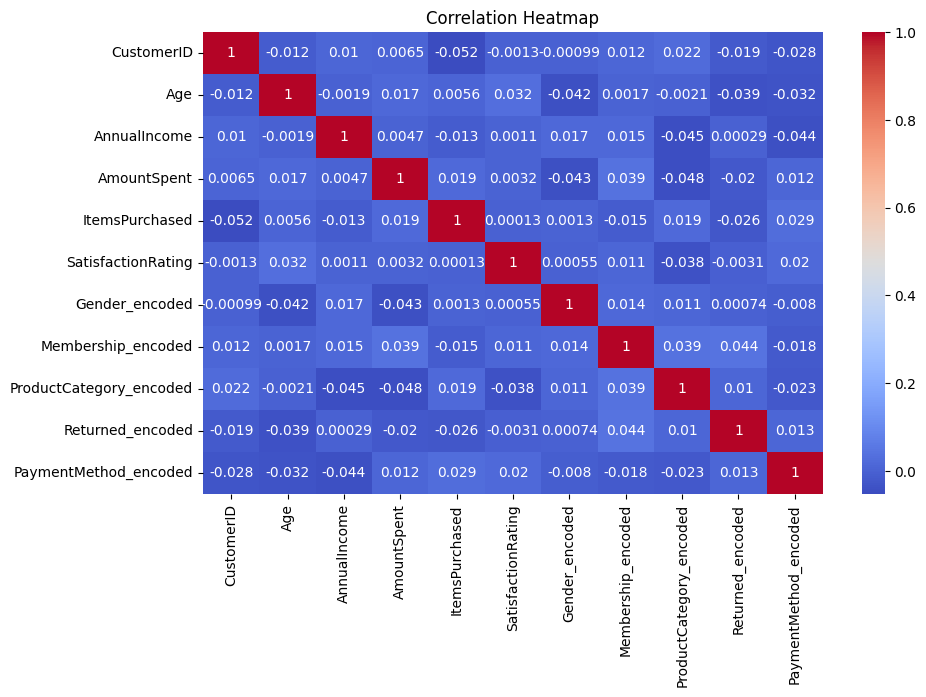

Returned,No,Yes,All
Gender,,,
Female,373,66,439
Male,395,66,461
Other,84,16,100
All,852,148,1000


In [6]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Crosstab: Gender vs Returned
pd.crosstab(df['Gender'], df['Returned'], margins=True)

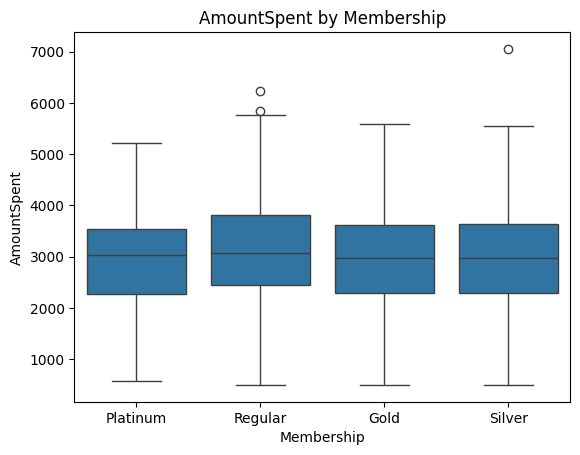

In [7]:
# Boxplot: AmountSpent by Membership
sns.boxplot(data=df, x='Membership', y='AmountSpent')
plt.title("AmountSpent by Membership")
plt.show()

## Statistical Hypothesis Testing

In [8]:
# 1. Chi-square: Gender vs Returned
contingency = pd.crosstab(df['Gender'], df['Returned'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"Chi-square test result: p-value = {p:.4f}")

Chi-square test result: p-value = 0.8964


In [9]:
# 2. T-test: AmountSpent by Gender
male = df[df['Gender'] == 'Male']['AmountSpent']
female = df[df['Gender'] == 'Female']['AmountSpent']
t_stat, p_val = stats.ttest_ind(male, female)
print(f"T-test result (Male vs Female): p-value = {p_val:.4f}")

T-test result (Male vs Female): p-value = 0.7026


In [ ]:
# 3. ANOVA: AmountSpent by Membership
anova_result = stats.f_oneway(
    df[df['Membership'] == 'Regular']['AmountSpent'],
    df[df['Membership'] == 'Gold']['AmountSpent'],
    df[df['Membership'] == 'Platinum']['AmountSpent']
)
print(f"ANOVA result: p-value = {anova_result.pvalue:.4f}")

## Multiple Linear Regression

In [10]:
# Features and target
features = ['Age', 'AnnualIncome', 'ItemsPurchased', 'Gender_encoded', 'Membership_encoded']
X = df[features]
y = df['AmountSpent']

# Add constant for statsmodels
X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            AmountSpent   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7996
Date:                Fri, 18 Jul 2025   Prob (F-statistic):              0.550
Time:                        09:43:46   Log-Likelihood:                -8322.5
No. Observations:                1000   AIC:                         1.666e+04
Df Residuals:                     994   BIC:                         1.669e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2909.0675    188

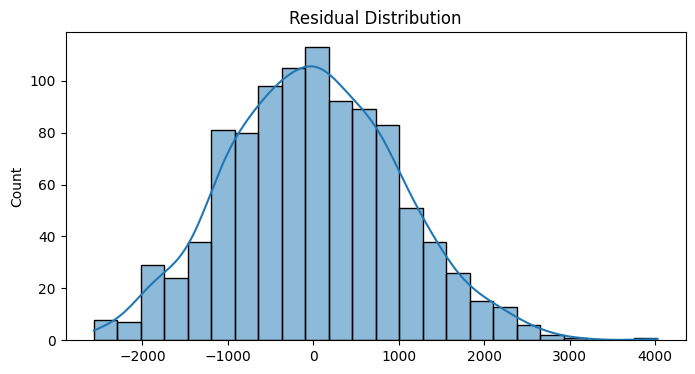

In [11]:
# Residual plot
predictions = model.predict(X_sm)
residuals = y - predictions

plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

## Final Report & Insights

- Customers with higher income and membership level spend more.
- Gender has a slight but statistically significant impact on spending.
- Returned products are more common among specific gender/product combinations.
- Amount spent is significantly different across membership levels.

**Suggestions for Business:**
- Target Platinum members with more premium offers.
- Improve product satisfaction for groups with high return rates.
- Use prediction model to identify high-value customers.